In [1]:
import requests as req
import pandas as pd
import numpy as np
api_key="87983fbe976988a9e22330ebf030a1ae"
#example url = 'https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&page={0}'
def requestAllMovies():
    pageNum=1
    movies = []
    while True:
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=87983fbe976988a9e22330ebf030a1ae&sort_by=revenue.desc&include_adult=true&page='+str(pageNum)
        requests=req.get(url)
        if not requests.ok:
            break
        
        temp=[requests.json()]
        movies = movies+temp
        pageNum = pageNum+1
        print(len(movies))
        print("page:",pageNum)
    return movies
movies=requestAllMovies()
print(movies)

1
page: 2
2
page: 3
3
page: 4
4
page: 5
5
page: 6
6
page: 7
7
page: 8
8
page: 9
9
page: 10
10
page: 11
11
page: 12
12
page: 13
13
page: 14
14
page: 15
15
page: 16
16
page: 17
17
page: 18
18
page: 19
19
page: 20
20
page: 21
21
page: 22
22
page: 23
23
page: 24
24
page: 25
25
page: 26
26
page: 27
27
page: 28
28
page: 29
29
page: 30
30
page: 31
31
page: 32
32
page: 33
33
page: 34
34
page: 35
35
page: 36
36
page: 37
37
page: 38
38
page: 39
39
page: 40
40
page: 41
41
page: 42
42
page: 43
43
page: 44
44
page: 45
45
page: 46
46
page: 47
47
page: 48
48
page: 49
49
page: 50
50
page: 51
51
page: 52
52
page: 53
53
page: 54
54
page: 55
55
page: 56
56
page: 57
57
page: 58
58
page: 59
59
page: 60
60
page: 61
61
page: 62
62
page: 63
63
page: 64
64
page: 65
65
page: 66
66
page: 67
67
page: 68
68
page: 69
69
page: 70
70
page: 71
71
page: 72
72
page: 73
73
page: 74
74
page: 75
75
page: 76
76
page: 77
77
page: 78
78
page: 79
79
page: 80
80
page: 81
81
page: 82
82
page: 83
83
page: 84
84
page: 85
85
page: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
df1 = pd.DataFrame(movies)
df1

,page,results,total_pages,total_results
0,1,"[{'adult': False, 'backdrop_path': None, 'genr...",39308,786149
1,2,"[{'adult': False, 'backdrop_path': '/phhbtV5BE...",39308,786149
2,3,"[{'adult': False, 'backdrop_path': '/6t8ES1d12...",39308,786149
3,4,"[{'adult': False, 'backdrop_path': '/wcKFYIiVD...",39308,786149
4,5,"[{'adult': False, 'backdrop_path': '/1stUIsjaw...",39308,786149
...,...,...,...,...
495,496,"[{'adult': False, 'backdrop_path': '/pwTp9JkhP...",39308,786149
496,497,"[{'adult': False, 'backdrop_path': '/20tHlgUYT...",39308,786149
497,498,"[{'adult': False, 'backdrop_path': '/9yPojPY2W...",39308,786149
498,499,"[{'adult': False, 'backdrop_path': None, 'genr...",39308,786149


In [26]:
y=df1["results"].tolist()
#map(y.pop, ['genre','adult',"backdrop_path"])
movielist=[]
for h in y:
    movielist= movielist+h

df = pd.DataFrame(movielist)
df.drop(df.columns[[0,1,2,4,5,6,8,9,11]],axis="columns",inplace=True)
#df.sort_values(by="popularity", inplace=True, ascending=False)
df["revenue"] = ""
df["director"] = ""
df = df.iloc[1:]
movielist = movielist[1:]
df
#print(df.iloc[0,1])

,id,popularity,title,vote_average,vote_count,revenue,director
1,19995,760.013,Avatar,7.5,26683,,
2,299534,133.248,Avengers: Endgame,8.3,22179,,
3,597,118.126,Titanic,7.9,21851,,
4,140607,64.946,Star Wars: The Force Awakens,7.3,17502,,
5,299536,226.628,Avengers: Infinity War,8.3,25818,,
...,...,...,...,...,...,...,...
9995,618214,8.501,The Perfect Candidate,6.7,77,,
9996,19400,16.213,Gwendoline,5.0,69,,
9997,465024,1.390,Queen,6.7,13,,
9998,37410,4.952,Henry Fool,6.7,70,,


In [27]:
df = df.iloc[:1000]
movielist = movielist[:1000]
num = 0
for film in movielist:
    director = " "
    print(film['title'])
    query = req.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +"?api_key=87983fbe976988a9e22330ebf030a1ae&append_to_response=credits")
    query = query.json()
    print(num)
    #print(query[])
    for member in query["credits"]["crew"]:
        for u in member:
            if member[u] == "Director":
                director = member["name"]
    df.iloc[num,5] = query['revenue']
    df.iloc[num,6] = director
    num = num + 1

Avatar
0
Avengers: Endgame
1
Titanic
2
Star Wars: The Force Awakens
3
Avengers: Infinity War
4
Spider-Man: No Way Home
5
Jurassic World
6
The Lion King
7
The Avengers
8
Furious 7
9
Christmas Under the Sea 2
10
Top Gun: Maverick
11
Frozen II
12
Avengers: Age of Ultron
13
Black Panther
14
Harry Potter and the Deathly Hallows: Part 2
15
Star Wars: The Last Jedi
16
Jurassic World: Fallen Kingdom
17
Frozen
18
Beauty and the Beast
19
Incredibles 2
20
The Fate of the Furious
21
Iron Man 3
22
Parallel Heroes
23
Minions
24
Captain America: Civil War
25
Aquaman
26
Spider-Man: Far from Home
27
Captain Marvel
28
Transformers: Dark of the Moon
29
The Lord of the Rings: The Return of the King
30
Skyfall
31
Transformers: Age of Extinction
32
The Dark Knight Rises
33
Joker
34
Star Wars: The Rise of Skywalker
35
Toy Story 4
36
Toy Story 3
37
Pirates of the Caribbean: Dead Man's Chest
38
Rogue One: A Star Wars Story
39
Aladdin
40
Pirates of the Caribbean: On Stranger Tides
41
Despicable Me 3
42
Finding 

339
TRON: Legacy
340
Rise
341
Mission: Impossible III
342
Snow White and the Huntsman
343
Mamma Mia! Here We Go Again
344
Twilight
345
Solo: A Star Wars Story
346
The Wolf of Wall Street
347
Superman Returns
348
Robin Hood: Prince of Thieves
349
Raiders of the Lost Ark
350
Independence Day: Resurgence
351
Monster Hunt
352
Godzilla: King of the Monsters
353
Star Trek
354
Black Adam
355
Happy Feet
356
Cars 3
357
Live Free or Die Hard
358
Ice Age
359
Monsters vs Aliens
360
Back to the Future
361
Black Widow
362
Godzilla
363
True Lies
364
Mad Max: Fury Road
365
Fifty Shades Darker
366
Slumdog Millionaire
367
Taken 2
368
Spider-Man: Into the Spider-Verse
369
1917
370
Once Upon a Time… in Hollywood
371
Batman Begins
372
What Women Want
373
Toy Story
374
Penguins of Madagascar
375
X-Men Origins: Wolverine
376
The Golden Compass
377
The Adventures of Tintin
378
G.I. Joe: Retaliation
379
Terminator Salvation
380
Captain America: The First Avenger
381
Edge of Tomorrow
382
There's Something About

734
The Green Hornet
735
Sleepless in Seattle
736
Out of Africa
737
Paddington 2
738
Baby Driver
739
Immortals
740
Taken
741
Percy Jackson & the Olympians: The Lightning Thief
742
Lightyear
743
Hansel & Gretel: Witch Hunters
744
Good Will Hunting
745
Better Days
746
Valerian and the City of a Thousand Planets
747
Ford v Ferrari
748
Elf
749
The Social Network
750
Chicken Run
751
Youth
752
Con Air
753
Interview with the Vampire
754
Flightplan
755
Yes Man
756
Non-Stop
757
Honey, I Shrunk the Kids
758
Fahrenheit 9/11
759
Jumper
760
Wild Wild West
761
Geostorm
762
Presumed Innocent
763
Jungle Cruise
764
Scary Movie 3
765
Inferno
766
Knocked Up
767
Green Lantern
768
Planes
769
The Terminal
770
What Happens in Vegas
771
It's Complicated
772
Captain Phillips
773
The Prince of Egypt
774
Jack Reacher
775
Kingdom of Heaven
776
Collateral
777
Too Cool to Kill
778
Dracula Untold
779
Central Intelligence
780
The Emoji Movie
781
Million Dollar Baby
782
The Help
783
Twins
784
Little Women
785
Valentin

In [28]:
dfEXTRA = df
df.head(1114)

,id,popularity,title,vote_average,vote_count,revenue,director
1,19995,760.013,Avatar,7.5,26683,2920357254,James Cameron
2,299534,133.248,Avengers: Endgame,8.3,22179,2797800564,Joe Russo
3,597,118.126,Titanic,7.9,21851,2187463944,James Cameron
4,140607,64.946,Star Wars: The Force Awakens,7.3,17502,2068223624,J.J. Abrams
5,299536,226.628,Avengers: Infinity War,8.3,25818,2046239637,Joe Russo
...,...,...,...,...,...,...,...
996,79,22.432,Hero,7.5,1880,177394432,Zhang Yimou
997,6957,27.927,The 40 Year Old Virgin,6.4,5805,177378645,Judd Apatow
998,65057,18.084,The Descendants,6.8,2394,177243185,Alexander Payne
999,34544,39.073,The A-Team,6.4,4052,177238796,Joe Carnahan


In [31]:
df10 = df.head(10)
df10

,id,popularity,title,vote_average,vote_count,revenue,director
1,19995,760.013,Avatar,7.5,26683,2920357254,James Cameron
2,299534,133.248,Avengers: Endgame,8.3,22179,2797800564,Joe Russo
3,597,118.126,Titanic,7.9,21851,2187463944,James Cameron
4,140607,64.946,Star Wars: The Force Awakens,7.3,17502,2068223624,J.J. Abrams
5,299536,226.628,Avengers: Infinity War,8.3,25818,2046239637,Joe Russo
6,634649,552.978,Spider-Man: No Way Home,8.0,15975,1916050941,Jon Watts
7,135397,83.714,Jurassic World,6.7,18614,1671713208,Colin Trevorrow
8,420818,99.778,The Lion King,7.1,8766,1667635327,Jon Favreau
9,24428,120.659,The Avengers,7.7,27832,1518815515,Joss Whedon
10,168259,73.387,Furious 7,7.2,9401,1515047671,James Wan


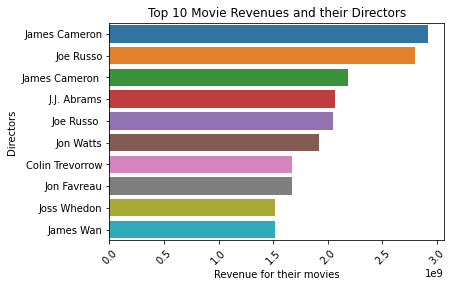

In [41]:
import seaborn as sb
import matplotlib.pyplot as plt
xAxis= df10.revenue.values.tolist()
yAxis= df10.director.values.tolist()
yAxis[2] = "James Cameron "
yAxis[4] = "Joe Russo "
plt.xticks(rotation=45) #used to rotate labels if needed.
plt.ylabel("Directors")
plt.xlabel("Revenue for their movies")
plt.title("Top 10 Movie Revenues and their Directors")
sb.barplot(x=xAxis,y=yAxis)
#sb.histplot(x=xAxis,y=yAxis)
plt.savefig('graph.png')